5. Vectorización de texto
Métodos:
CountVectorizer: Representa el texto como una matriz de frecuencia de palabras.
TfidfVectorizer: Pondera las palabras según su relevancia en el corpus.

# 📌 Vectorización

## ¿Por qué vectorizar?

La vectorización es un proceso crucial en NLP ya que nos permite convertir material textual, desestructurado, en vectores numéricos. Dado que las computadoras no pueden procesar directamente texto en su forma original y que los modelos de Machine Learning trabajan con datos **numéricos y estructurados**, necesitamos traducir de cierta forma ese input a valores que las computadoras pueden procesar.

### **Ejemplo:**
Supongamos que queremos entrenar un modelo para detectar si una reseña de una película es positiva o negativa.

 **Entrada:**  
*"Me encantó la película, la actuación fue brillante."*

 **Lo que la computadora entiende:**  
🚫 `"Me encantó la película, la actuación fue brillante."`  
✅ `Vector numérico: [0.2, 0.4, 0.7, 0.1, ...]`

El texto necesita convertirse en **una representación matemática**, y el proceso de convertir palabras en números se llama **vectorización**.



### Vectores:
Los vectores son básicamente conjuntos de números que representan diversas características del texto. Estos conjuntos pueden tener distintas dimensiones:

- Vectores 1D : representan palabras individuales (por ejemplo, word embeddings).
- Vectores 2D : representan secuencias de palabras, como oraciones o documentos (por ejemplo, sentence embeddings).
- Vectores multidimensionales : pueden representar estructuras y relaciones más complejas, involucrando potencialmente espacios de dimensiones superiores.

Al aplicar diferentes técnicas de vectorización, los vectores resultantes variarán según el método utilizado. Cada técnica produce vectores con características y rangos de valores únicos. Por ejemplo, algunas técnicas producen valores binarios (0 o 1), mientras que otras producen valores continuos entre 0 y 1. 


In [ ]:
# En Python podemos pensar que un vector es una lista de números
# TODO: Verificar que sea necesario aclarar esto, a esta altura del partido es confundirlos aun mas... 
import numpy as np

vector = [1, 2, 3, 4, 5]
otro_vector = [[0.1, 0.2, 0.8, -0.3, 0.5]]

np_vector = np.array(vector)
np_otro_vector = np.array(otro_vector)


print(np_vector)
print(np_vector.shape) # (5,) -> 5 elementos en una dimensión (1D vector)

print(np_otro_vector)
print(np_otro_vector.shape) # (1, 5) -> 1 fila con 5 elementos (2D vector). Sería una matriz de 1x5 en lugar de un vector de 5 elementos.

[1 2 3 4 5]
(5,)
[[ 0.1  0.2  0.8 -0.3  0.5]]
(1, 5)



## 📌 **El desafío de representar el texto**
Al vectorizar texto, buscamos representar su significado semántico en forma numérica. Esto implica preservar al máximo los matices y el contexto de las palabras, permitiendo que los modelos los interpreten y utilicen de manera efectiva.


| Característica | Desafío |
|--------------|---------|
| El lenguaje es ambiguo | "Banco" puede referirse a una entidad financiera o un asiento. |
| Orden de palabras importa | "El perro mordió al hombre" vs. "El hombre mordió al perro". |
| Las palabras tienen significado | "Perro" y "can" son similares, pero el modelo debe aprender esto. |
| Vocabulario extenso | ¿Cómo representar millones de palabras en un espacio finito? |



📍 Ejemplo : Imaginemos que tenemos dos oraciones:

- "El perro se sienta en la alfombra".
- "Un can descansa sobre tapete".


Sin la vectorización, un modelo de ML vería estos strings de formas completamente diferentes porque utilizan palabras diferentes. Pero con vectorización, especialmente con técnicas avanzadas como *word embeddings*, el modelo puede entender que "perro" y "can", así como "alfombra" y "tapete", tienen significados similares.

Supongamos que usamos una técnica de vectorización avanzada que nos permite hacer lo siguiente:

- "perro" podría convertirse en un vector como `[0,2, 0,5, 0,1, …]`
- "can" podría convertirse en un vector como `[0,21, 0,49, 0,12, …]`


En este caso, los vectores de "perro" y "can" estarían muy próximos en el espacio vectorial, lo que indica su similitud semántica. Lo mismo ocurre con "tapete" y "alfombra".


Esto significa que debemos elegir **formas de vectorización** que conserven **información clave** sin hacer el problema computacionalmente inmanejable.



## **Distintos métodos de vectorización**
Existen distintos métodos de vectorización, que van desde **técnicas simples** hasta **modelos más avanzados**, con sus complejidades particulares:

### 🔹 Representaciones básicas:
1. **One-Hot Encoding:** Representa palabras como vectores binarios, pero escala muy mal.
2. **Count Vectorizer (Bag of Words):** Representa frecuencia de palabras, sin considerar contexto.
3. **TF-IDF (Term Frequency - Inverse Document Frequency):** Ajusta la importancia de palabras comunes y relevantes.

### 🔹 Representaciones más avanzadas:
4. **Word Embeddings (Word2Vec, GloVe, FastText):** Capturan el significado de las palabras y sus relaciones.
5. **Representaciones Contextuales (BERT, GPT):** Toman en cuenta el contexto en el que aparece una palabra.



Para esta clase, nos enfocaremos en **las primeras tres técnicas** y cómo usarlas en un **Naïve Bayes Classifier** para clasificación de texto.


## 📌 Bag of Words
Para preparar el terreno, vamos a ver un ejemplo sencillo de cómo un texto puede representarse numéricamente.

**Texto original:**
- "El gato duerme en la cama"
- "El perro ladra en la calle"

 **Vocabulario único (Bag of Words):**  

- ["el", "gato", "duerme", "en", "la", "cama", "perro", "ladra", "calle"]

 **Matriz de conteo:**

| Documento | el | gato | duerme | en | la | cama | perro | ladra | calle |
|-----------|----|------|--------|----|----|------|-------|-------|-------|
| "El gato duerme en la cama" | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 |
| "El perro ladra en la calle" | 1 | 0 | 0 | 1 | 0 | 0 | 1 | 1 | 1 |

Cada fila representa un documento y cada columna una palabra del vocabulario. 

**Esto es lo que los modelos de Machine Learning ven** en lugar del texto original.


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from funciones import preprocess_text


corpus = ["El gato duerme en la cama", "El perro ladra en la calle", "Un gato descansa en el tapete", "Los perros juegan en la calle", "El gato y el perro juegan."]
norm_corpus = [preprocess_text(doc) for doc in corpus]


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(norm_corpus)
print("Matriz Termino documento")
print(vectorizer.get_feature_names_out())  # Ver palabras en vocabulario
print(X.toarray())  # Matriz de términos

Matriz Termino documento
['calle' 'cama' 'descansa' 'duerme' 'gato' 'juegan' 'ladra' 'perro'
 'perros' 'tapete']
[[0 1 0 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 1 1 0 0]
 [0 0 1 0 1 0 0 0 0 1]
 [1 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 1 0 1 0 0]]


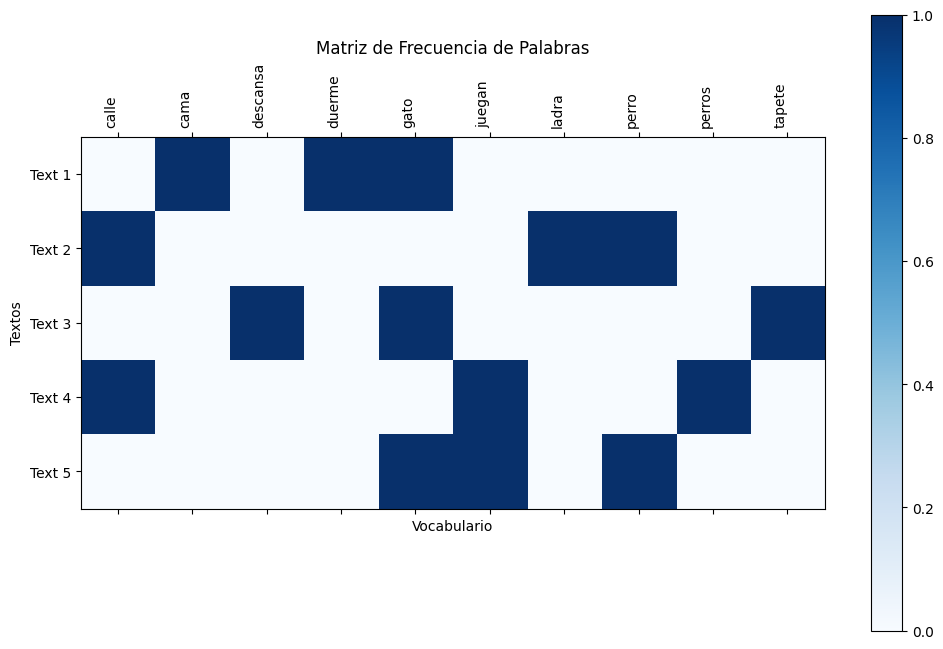

In [2]:
from funciones import plot_text_word_matrix


plot_text_word_matrix(norm_corpus)

In [26]:
from nltk.probability import FreqDist
words = [token for token in norm_corpus]

FreqDist(norm_corpus)

FreqDist({'gato duerme cama': 1, 'perro ladra calle': 1, 'gato descansa tapete': 1, 'perros juegan calle': 1, 'gato perro juegan': 1})


**🔹 ¿Qué problema tiene este enfoque?**
- No considera el orden de las palabras.
- No diferencia palabras con significados similares.
- Puede generar vectores muy grandes y dispersos.



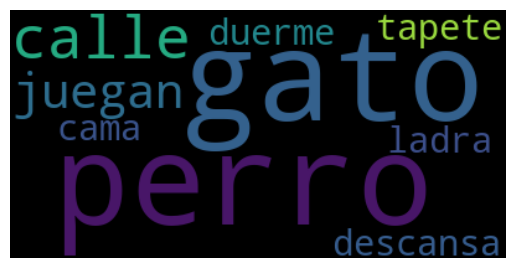

In [3]:
from funciones import plot_bag_of_words

plot_bag_of_words(corpus)

## 📌 TF-IDF (Term Frequency - Inverse Document Frequency)


Punto clave: Ajusta la frecuencia de las palabras para evitar que términos comunes dominen la representación.

Conceptos clave:

- TF (Term Frequency): Frecuencia normalizada de una palabra en un documento.
- IDF (Inverse Document Frequency): Reduce la importancia de palabras muy frecuentes en todos los documentos.


🔹 Ventaja: Mejora la representación considerando la relevancia de palabras. 


🔹 Desventaja: No captura la semántica de las palabras.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

#corpus = ["El gato duerme.", "El perro ladra.", "El gato y el perro juegan."]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(norm_corpus)
print("Matriz de frecuencia de palabras:")
print(X.toarray())
print(vectorizer.get_feature_names_out())


Matriz de frecuencia de palabras:
[[0.         0.63907044 0.         0.63907044 0.42799292 0.
  0.         0.         0.         0.        ]
 [0.53177225 0.         0.         0.         0.         0.
  0.659118   0.53177225 0.         0.        ]
 [0.         0.         0.63907044 0.         0.42799292 0.
  0.         0.         0.         0.63907044]
 [0.53177225 0.         0.         0.         0.         0.53177225
  0.         0.         0.659118   0.        ]
 [0.         0.         0.         0.         0.50620441 0.60981846
  0.         0.60981846 0.         0.        ]]
['calle' 'cama' 'descansa' 'duerme' 'gato' 'juegan' 'ladra' 'perro'
 'perros' 'tapete']


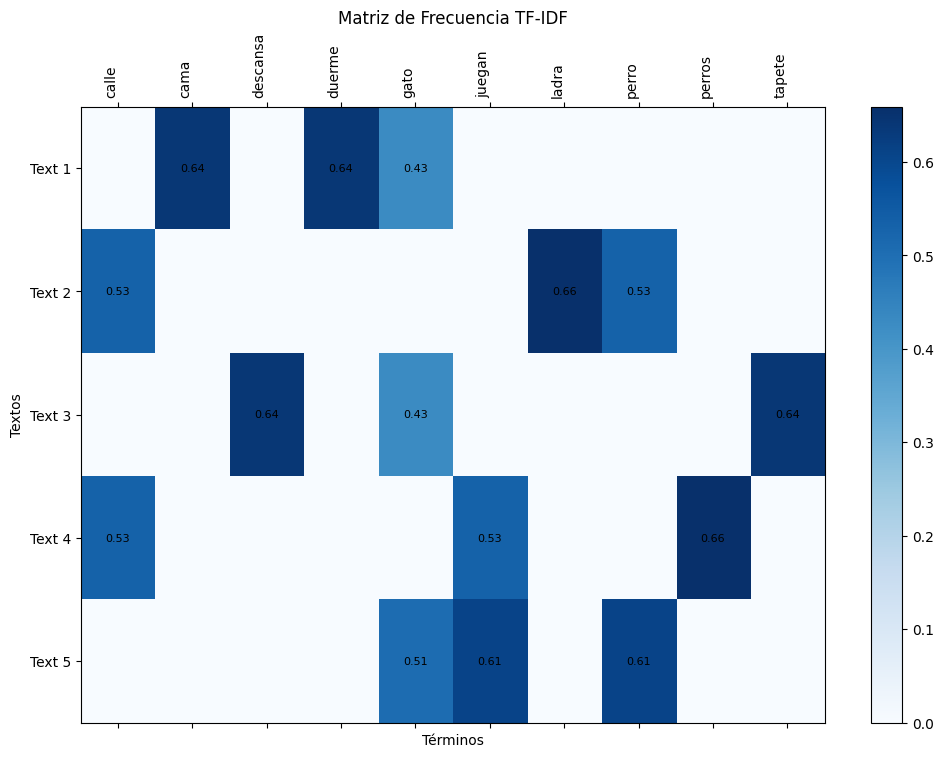

In [5]:
from funciones import plot_tfif_matrix

plot_tfif_matrix(X, norm_corpus, vectorizer.get_feature_names_out())

## Aplicacion de vectorización en un clasificador
Objetivo: Demostrar cómo las técnicas de vectorización pueden alimentar un modelo de Machine Learning real para tareas de NLP, en este caso, clasificación de texto...


In [7]:

import pandas as pd

csv_data = pd.read_csv("synth_data_sentiment.csv")


csv_data

,text,label
0,"A pesar de algunos inconvenientes menores, la ...",1
1,"No esperaba mucho, pero me sorprendió gratamen...",1
2,"El lugar es un poco pequeño, pero el ambiente ...",1
3,"Al principio no me convencía, pero terminó sie...",1
4,"La espera fue larga, aunque valió la pena cada...",1
...,...,...
1015,"No puedo estar más feliz con la compra, súper ...",1
1016,"La atención al cliente es excelente, resolvier...",1
1017,"Horrible, no entiendo cómo tiene buenas reseñas.",0
1018,"Voy a recomendarlo a todos mis amigos, una mar...",1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sentiment_corpus = csv_data["text"].to_list()[:500]
sentiment_labels = csv_data["label"].tolist()[:500]  # 1 = positivo, 0 = negativo

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentiment_corpus)

print(vectorizer.get_feature_names_out())  # Ver palabras en vocabulario


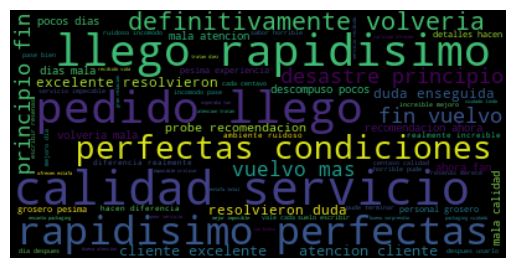

In [10]:
plot_bag_of_words(sentiment_corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\schia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


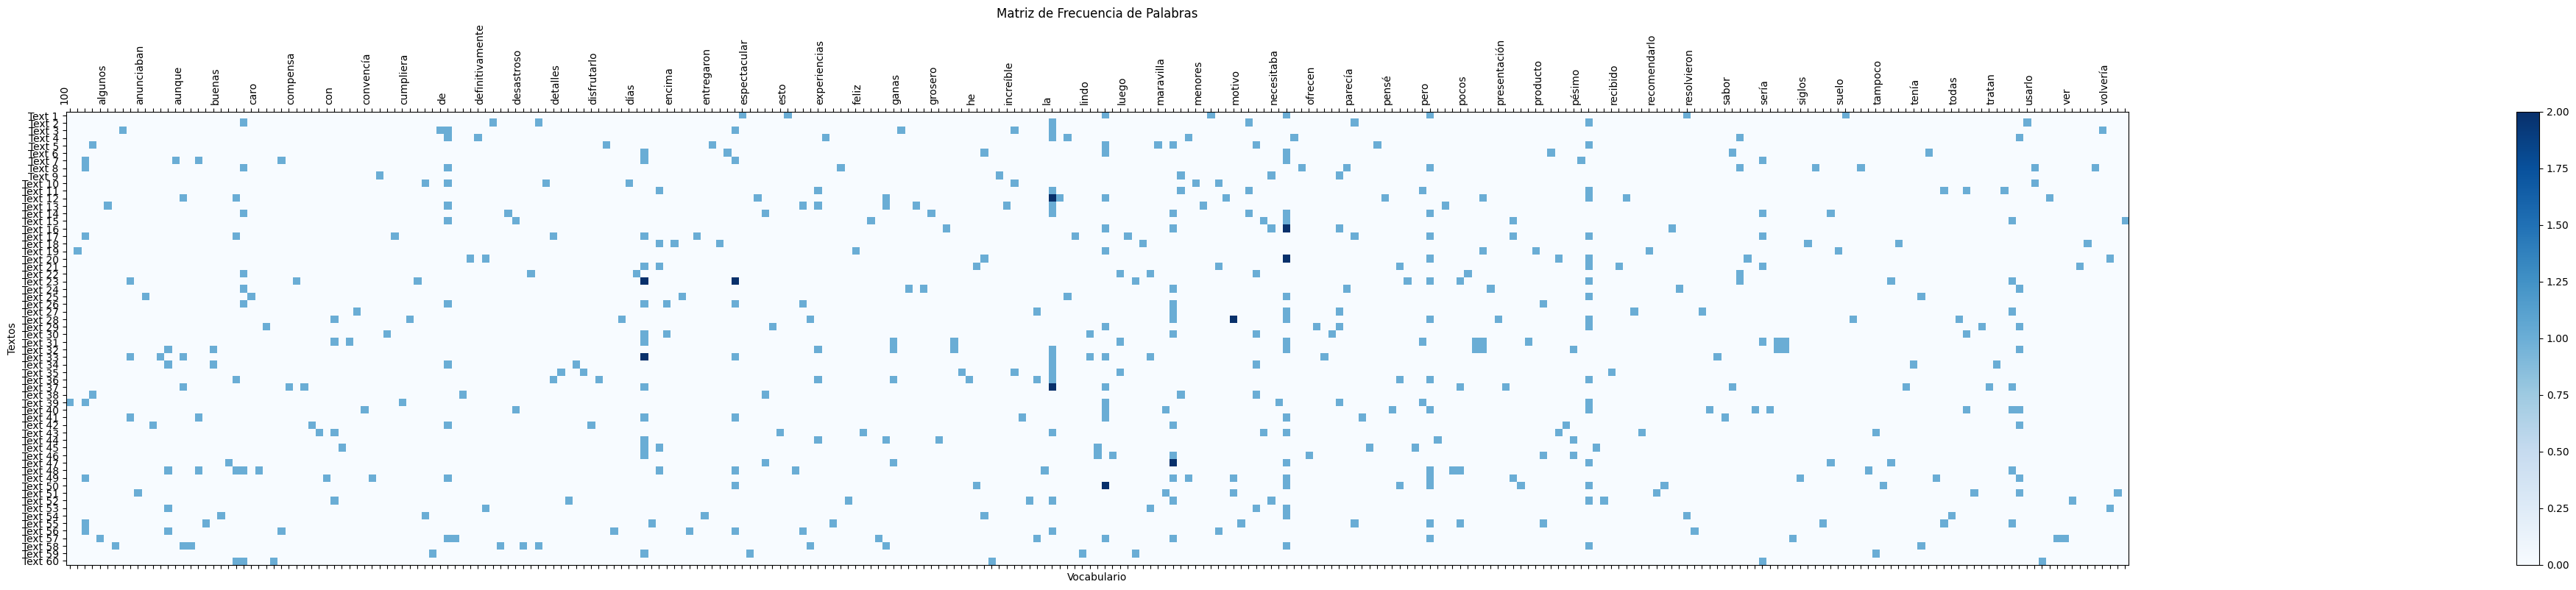

In [3]:
from funciones import plot_text_word_matrix

plot_text_word_matrix(list(set(corpus))) ## TODO: Sortear por frwequencia de palabras

Explicación:

Cada oración se transforma en un vector basado en la frecuencia de palabras.
Se observa que las palabras más comunes tendrán valores más altos.


Luego usamos Naïve Bayes,  un modelo basado en probabilidad, ideal para clasificación de texto porque asume independencia entre palabras.
Al usar Count Vectorizer, cada documento se representa como una bolsa de palabras, lo que encaja bien con la suposición del modelo.

# TODO: ver de plotear palabras y ocurrencias

In [4]:
# NB

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Entrenamos el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.97


In [ ]:
nueva_sentence = "Wow… Me encantó esperar dos horas para que me trajeran la comida fría."
# print(model.predict(vectorizer.transform([nueva_sentence])))<

if model.predict(vectorizer.transform([nueva_sentence])) == 1:
    print("Sentimiento positivo")
else: 
    print("Sentimiento negativo")

Sentimiento positivo


In [15]:
# Mostrar como usando IFIDF se puede mejorar el modelo

from sklearn.feature_extraction.text import TfidfVectorizer
from funciones import preprocess_text

norm_corpus = [preprocess_text(doc) for doc in corpus]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy con TF-IDF: {accuracy_score(y_test, y_pred):.2f}")


Accuracy con TF-IDF: 0.98


In [16]:
print(model.predict(vectorizer.transform([nueva_sentence])))

[1]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(texts):
    # Vectorize the text
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()

    # Create a dummy true labels and predicted labels for demonstration
    true_labels = np.random.choice(words, len(words))
    predicted_labels = np.random.choice(words, len(words))

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=words)

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set axis labels
    ax.set_xticks(np.arange(len(words)))
    ax.set_yticks(np.arange(len(words)))
    ax.set_xticklabels(sorted(words), rotation=90)
    ax.set_yticklabels(sorted(words))

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of Words')
    plt.show()


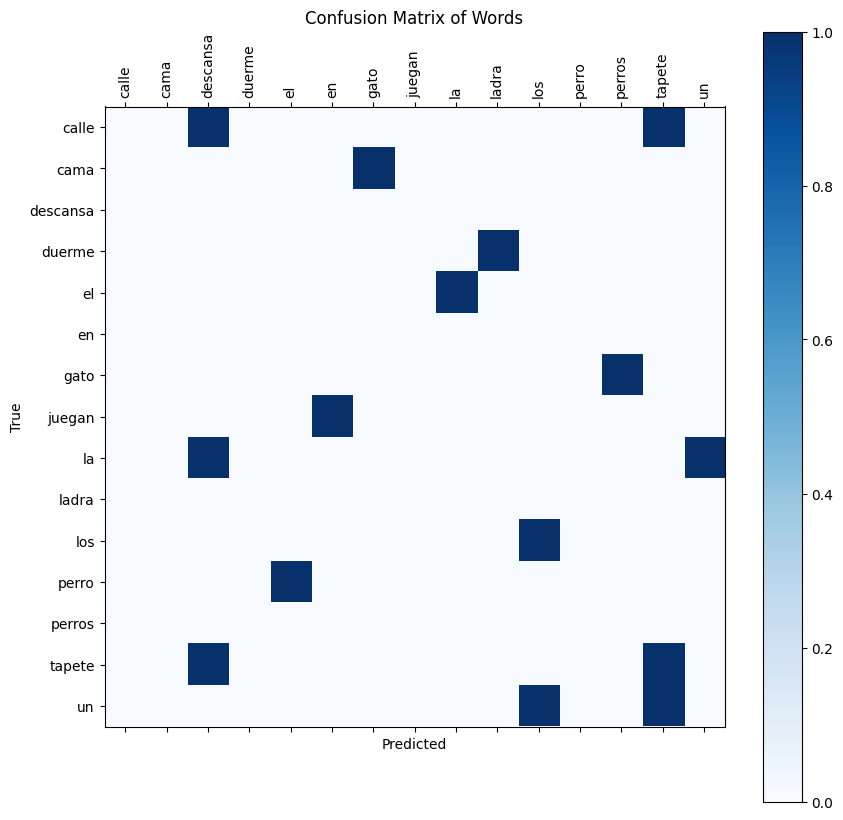

In [7]:
plot_confusion_matrix(corpus)

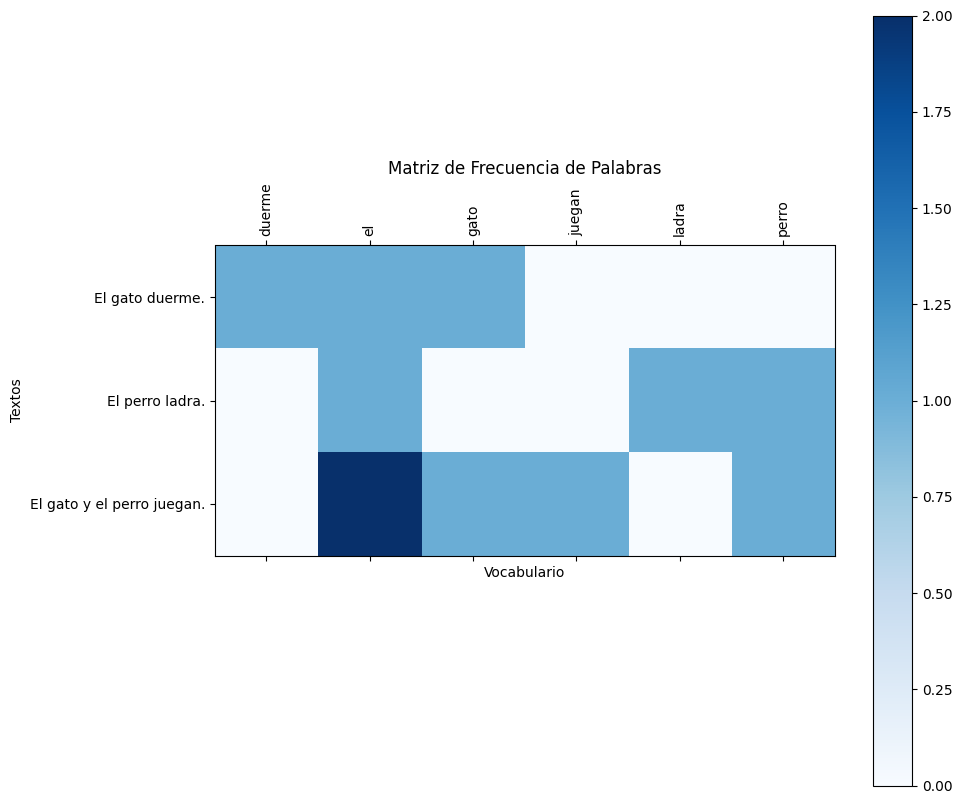

In [6]:

def plot_text_word_matrix(texts):
    # Vectorize the text
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()

    # Convert the sparse matrix to a dense matrix
    X_dense = X.toarray()

    # Plot the matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(X_dense, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set axis labels
    ax.set_xticks(np.arange(len(words)))
    ax.set_yticks(np.arange(len(texts)))
    ax.set_xticklabels(words, rotation=90)
    ax.set_yticklabels([f'{i}' for i in texts])

    plt.xlabel('Vocabulario')
    plt.ylabel('Textos')
    plt.title('Matriz de Frecuencia de Palabras')
    plt.show()

# Ejemplo de uso
texts = [
    "Este es un texto de ejemplo",
    "Otro texto de ejemplo para vectorización",
    "Ejemplo de vectorización de texto"
]
plot_text_word_matrix(corpus)

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, [1, 0, 1], test_size=0.2)
model = MultinomialNB()
model.fit(X_train, y_train)
print("Precisión del modelo:", model.score(X_test, y_test))

Precisión del modelo: 0.0
